## Topic Modelling by scraping news data

In [25]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [26]:
url = 'https://www.indiatoday.in/'

In [27]:
response = requests.get(url)

In [28]:
response

<Response [200]>

In [29]:
soup = BeautifulSoup(response.text, "html.parser")

<!DOCTYPE html>
<!--[if IEMobile 7]><html class="iem7" lang="en" dir="ltr"><![endif]--><!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7" lang="en" dir="ltr"><![endif]--><!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8" lang="en" dir="ltr"><![endif]--><!--[if IE 8]><html class="lt-ie9" lang="en" dir="ltr"><![endif]--><!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#"><!--<![endif]--><head><meta charset="utf-8"/><title>Latest News, Breaking News Today - Bollywood, Cricket, Business, Politics - IndiaToday | IndiaToday</title><meta content="width=device-width, minimum-scale=1, initial-scale=1.0, maximum-scale=5.0" name="viewport"/> <!-
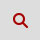
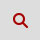
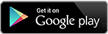
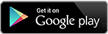
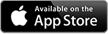
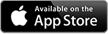
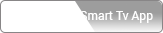
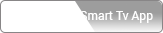

In [30]:
soup

In [51]:
news = soup.find('ul',{"class":"itg-listing"})

In [56]:
records = []
for i in news.find_all('a'):
    records.append(i.text)
print(records)

['9 months into the pandemic, how well do you know novel coronavirus? Take a Covid quiz', 'Shreyas Iyer set to replace Gambhir as Delhi’s 2nd-most capped captain', "Coronavirus LIVE: 6,477 new Covid infections push Kerala's active case tally to 48,892", "B'wood drug probe LIVE: Deepika's manager Karishma leaves NCB office after 7-hour grilling", 'Bihar to vote in 3 phases from Oct 28 to Nov 7, results on Nov 10', 'People are twisting my comments, did not blame Anushka: Gavaskar clears the air', ' Innovative and Immersive- SLED is the Real Deal in TV Viewing/ SLED Displays: All Colour and No Eye Strain', 'The secret ingredient that makes Harvest Gold the first choice for millions of Indians', 'Vodafone wins international arbitration against India in Rs 20,000 crore tax dispute case', 'Ilaiyaraaja grieves SP Balasubrahmanyam: Balu, I am at a loss of words', 'Farmers in trouble after Centre bans export of onions', 'Haryana: One injured as police lathicharge physical training instructors p

In [63]:
#Data Preprocessing
#Tokenization
'''
Loading gensim and nltk libraries
'''
#!pip install gensim
import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess

from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem import *
import numpy as np
np.random.seed(400)

In [64]:
import pandas as pd
stemmer = SnowballStemmer("english")
original_words=['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']

singles= [WordNetLemmatizer().lemmatize(plural,pos='v') for plural in original_words]

pd.DataFrame(data={'Original Words':original_words, 'Lemma':singles})



,Original Words,Lemma
0,caresses,caress
1,flies,fly
2,dies,die
3,mules,mules
4,denied,deny
5,died,die
6,agreed,agree
7,owned,own
8,humbled,humble
9,sized,size


In [65]:
# writing function for the entire dataset
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result
        

In [66]:
#preview a document before preprocessing

#document_num = 50
doc_sample = 'This disk has failed many times. I would like to get it replaced.'

print("Original Document: ")
words=[]
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original Document: 
['This', 'disk', 'has', 'failed', 'many', 'times.', 'I', 'would', 'like', 'to', 'get', 'it', 'replaced.']


Tokenized and lemmatized document: 
['disk', 'fail', 'time', 'like', 'replac']


In [67]:
processed_docs = []

for doc in records:
    processed_docs.append(preprocess(doc))

In [68]:
len(processed_docs)

17

In [69]:
print(processed_docs[:2])

[['month', 'pandem', 'know', 'novel', 'coronavirus', 'covid', 'quiz'], ['shreya', 'iyer', 'replac', 'gambhir', 'delhi', 'cap', 'captain']]


In [70]:
#bag of words on the data set
dictionary = gensim.corpora.Dictionary(processed_docs)

In [71]:
print (dictionary)

Dictionary(111 unique tokens: ['coronavirus', 'covid', 'know', 'month', 'novel']...)


In [72]:
#Lets see if dictionary created succesfully
count=0
for k,v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >20:
        break

0 coronavirus
1 covid
2 know
3 month
4 novel
5 pandem
6 quiz
7 cap
8 captain
9 delhi
10 gambhir
11 iyer
12 replac
13 shreya
14 activ
15 case
16 infect
17 kerala
18 live
19 push
20 talli


In [96]:
#remove rare and repeatative words
dictionary.filter_extremes(no_below=20,no_above=0.1,keep_n=5)

In [97]:
print (dictionary)

Dictionary(0 unique tokens: [])


In [98]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [99]:
bow_corpus[0]

[]

In [102]:
#preview 
document_num = 10
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]],
                                                     bow_doc_x[i][1]))

In [ ]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [ ]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")